In [2]:
# cv2, numpy, matplotlib.pyplot
import cv2 # 컴퓨터비전용 라이브러리
import numpy as np # 행렬 연산
import matplotlib.pyplot as plt # 시각화 라이브러리

In [3]:
img = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE) # RGB -> BGR
h,w = img.shape
print(h,w)

220 220


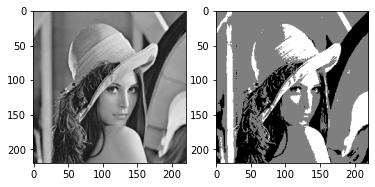

In [19]:
# 3. 다음의 영상 처리 기법을 구현하라

# null transform : y = 1·x + 0
a, b = 1, 0
result1 = a*img + b

# negative transform : y = -1·x + 255 
a, b = -1, 255
result2 = a*img + b

# gamma correction : y = (x/255)^γ* 255
gamma = 4
result3 = np.power(img/255, gamma)* 255 # == result3 = (img/255) ** gamma * 255

# intensity contrast stretch : y = a·x + b (a, b = ?)
# •  x축 범위 : 50~200, y축 범위 : 0~255
# •  (단, y가 0보다 작으면 0, 255보다 크면 255)
a = (255-0) / (200-50)
b = ((255-0) / (200-50))*50
result4 = a*img + b

# intensity contrast compress : y = a·x + b (a, b = ?)
# •  x축 범위 : 0~255, y축 범위 : 50~200
a = (200-50) / (255-0)
b = 50
result5 = a*img + b

# binarization : T = 128
T = 128
result6 = img > 128

# range emphasis transform : range(a,b) = (150,200)
# •  np.where : (다중) 특정 조건에 맞는 위치 찾기
a, b = 150, 200
result7 = img.copy()
result7[np.where((img>a) & (img<b))] = 255

     
# posterizing : 10개의 그레이레벨로 표현하는 코드
# •  다소 복잡한 문제이지만 생각해보자

result = np.zeros((h,w))
# print(result)
step = 3
# x_range = [0, 127.5, 255] y_range = [0, 255]
x_range = np.linspace(0, 255, step+1)
y_range = np.linspace(0, 255, step)
# print(x_range, y_range)

for i in range(0,h):
    for j in range(0,w):
        for k in range(1, len(x_range)):
            if img[i,j] <= x_range[k]:
                result[i,j] = y_range[k-1]
                break
result = np.uint8(result)
# print(result)

plt.subplot(1, 2, 1); plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(result, cmap = 'gray')

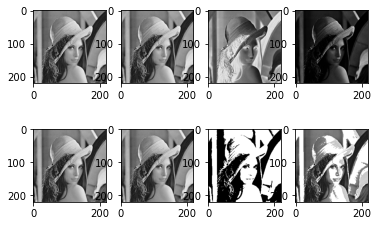

In [13]:
# numpy를 사용하여 랩핑 구현하기(다음 페이지의 '행렬 및 성질' 참고)
# add(100), subtract(100), multiply(1.7), divide(3)

ex2_result1 = (img + 100).astype('uint8') # cv2.add(img, 100)
ex2_result2 = (img - 100).astype('uint8')
ex2_result3 = (img * 1.7).astype('uint8')
ex2_result4 = (img / 3).astype('uint8')

plt.subplot(2, 4, 1); plt.imshow(img, cmap = 'gray')
plt.subplot(2, 4, 2); plt.imshow(result1, cmap = 'gray')
plt.subplot(2, 4, 3); plt.imshow(result2, cmap = 'gray')
plt.subplot(2, 4, 4); plt.imshow(result3, cmap = 'gray')
plt.subplot(2, 4, 5); plt.imshow(result4, cmap = 'gray')
plt.subplot(2, 4, 6); plt.imshow(result5, cmap = 'gray')
plt.subplot(2, 4, 7); plt.imshow(result6, cmap = 'gray')
plt.subplot(2, 4, 8); plt.imshow(result7, cmap = 'gray')